C:\Users\erikm\anaconda3\envs\kipraktikum2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,067 (1.38 MB)

 Trainable params: 361,067 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.1881 - loss: 3.0104 - val_accuracy: 0.6014 - val_loss: 1.2970
Epoch 2/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.6324 - loss: 1.1073 - val_accuracy: 0.8506 - val_loss: 0.5735
Epoch 3/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.8097 - loss: 0.5607 - val_accuracy: 0.8957 - val_loss: 0.3770
Epoch 4/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.8808 - loss: 0.3446 - val_accuracy: 0.9159 - val_loss: 0.3401
Epoch 5/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9138 - loss: 0.2495 - val_accuracy: 0.9392 - val_loss: 0.2549
Epoch 6/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9347 - loss: 0.1928 - val_accuracy: 0.9397 - val_loss: 0.2783
Epoch 7/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9513 - loss: 0.1470 - val_accuracy: 0.9424 - val_loss: 0.2491
Epoch 8/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9587 - loss: 0.1271 - 

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


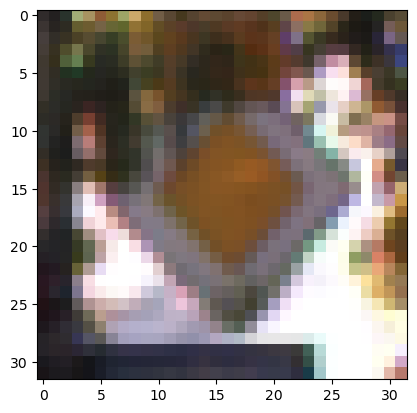

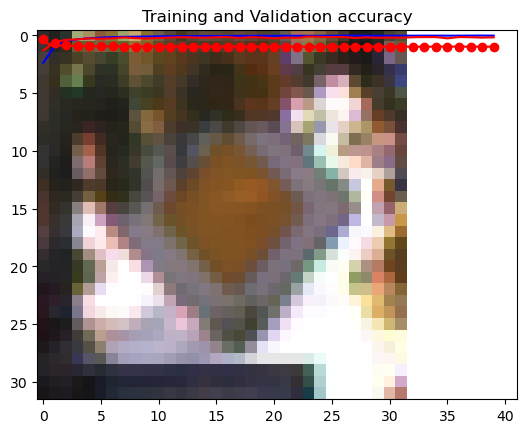

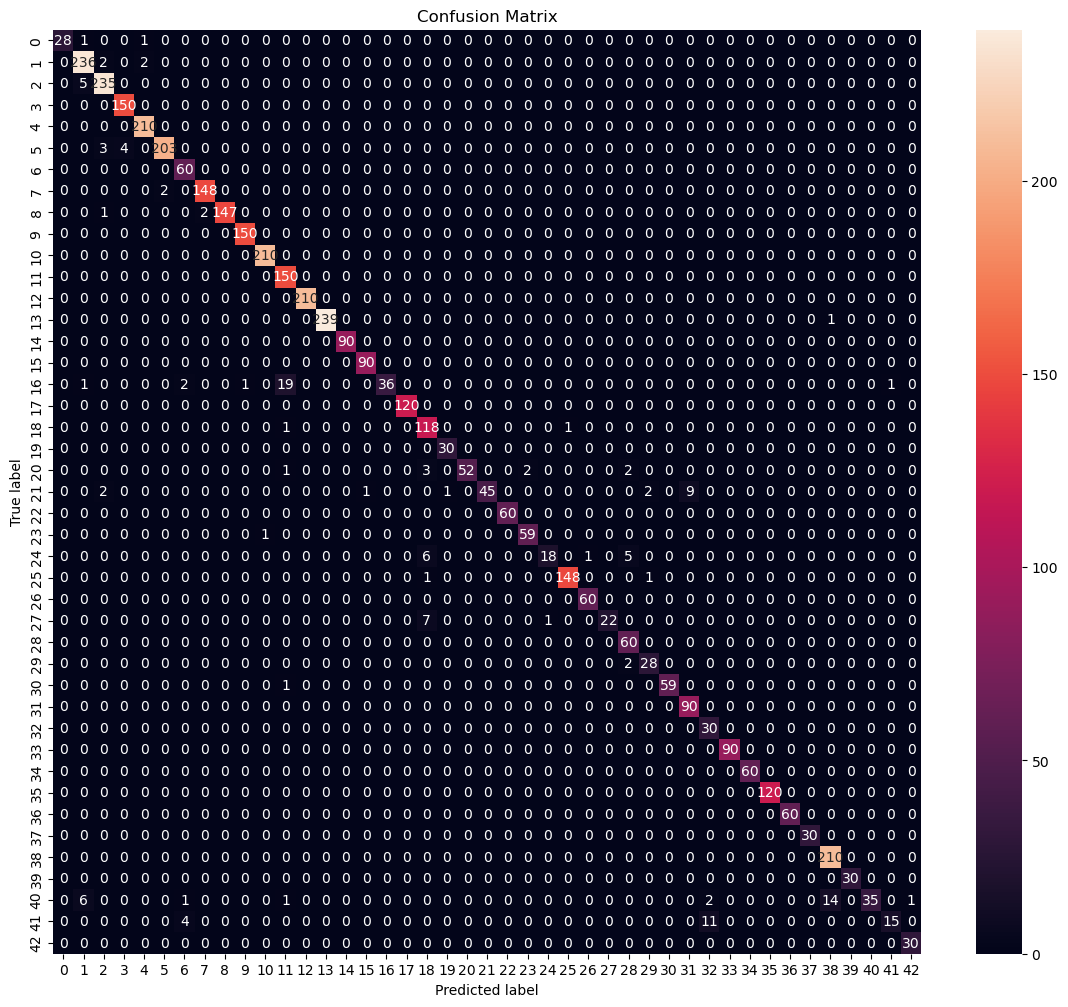

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

with open(os.path.join("dataset", "train.p"), mode='rb') as training_data:
    train = pickle.load(training_data)
with open(os.path.join("dataset", "valid.p"), mode='rb') as validation_data:
    valid = pickle.load(validation_data)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

X_train_norm = X_train / 255
X_valid_norm = X_valid / 255

i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.figure()
plt.grid(False)
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray') # cmap

from tensorflow.keras import datasets, layers, models

model = models.Sequential()

# Only in the first layer you have to select the input_shape of the data (image).
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(43, activation='softmax'))  # 43 Klassen für Verkehrszeichen


# Prints a summary of your network
model.summary()

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x = X_train_norm,
                    y = y_train,
                    batch_size = 64,
                    epochs = 40,
                    verbose = 1,
                    validation_data = (X_valid_norm, y_valid))

history.history.keys()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

model.save('saved_model/Test2.h5')

#Matrix
from sklearn.metrics import confusion_matrix


X_valid_norm = X_valid / 255

y_pred_probs = model.predict(X_valid_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_valid, y_valid, verbose=2)
print(f"Validation Accuracy: {test_accuracy:.2%}")